In [71]:
from gluonts.dataset.repository.datasets import get_dataset, dataset_recipes
from gluonts.dataset.util import to_pandas
from gluonts.dataset.field_names import FieldName
from gluonts.dataset.common import ListDataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder

In [33]:
print(f"Available datasets: {list(dataset_recipes.keys())}")
dataset = get_dataset("solar-energy", regenerate=False)

Available datasets: ['constant', 'exchange_rate', 'solar-energy', 'electricity', 'traffic', 'exchange_rate_nips', 'electricity_nips', 'traffic_nips', 'solar_nips', 'wiki-rolling_nips', 'taxi_30min', 'kaggle_web_traffic_with_missing', 'kaggle_web_traffic_without_missing', 'kaggle_web_traffic_weekly', 'm1_yearly', 'm1_quarterly', 'm1_monthly', 'nn5_daily_with_missing', 'nn5_daily_without_missing', 'nn5_weekly', 'tourism_monthly', 'tourism_quarterly', 'tourism_yearly', 'cif_2016', 'london_smart_meters_without_missing', 'wind_farms_without_missing', 'car_parts_without_missing', 'dominick', 'fred_md', 'pedestrian_counts', 'hospital', 'covid_deaths', 'kdd_cup_2018_without_missing', 'weather', 'm3_monthly', 'm3_quarterly', 'm3_yearly', 'm3_other', 'm4_hourly', 'm4_daily', 'm4_weekly', 'm4_monthly', 'm4_quarterly', 'm4_yearly', 'm5']


In [44]:
tourism = pd.read_csv("cleaned_tourism.csv")
pd.concat([tourism.head(), tourism.tail()])

,quarter,region,state,trips
0,1998-01-01,Adelaide,SA,658.553895
1,1998-01-01,Adelaide_Hills,SA,9.798630
2,1998-01-01,Alice_Springs,NT,20.207638
3,1998-01-01,Australias_Coral_Coast,WA,132.516409
4,1998-01-01,Australias_Golden_Outback,WA,161.726948
6455,2015-10-01,total,total,25759.429177
6456,2016-01-01,total,total,27492.360374
6457,2016-04-01,total,total,24791.797758
6458,2016-07-01,total,total,24696.079808
6459,2016-10-01,total,total,27017.077807


In [69]:
tourism.groupby(["region", "state"]).count().describe()

,quarter,trips
count,85.0,85.0
mean,76.0,76.0
std,0.0,0.0
min,76.0,76.0
25%,76.0,76.0
50%,76.0,76.0
75%,76.0,76.0
max,76.0,76.0


In [56]:
metadata = {
    "prediction_length": 14,
    "ts_keys": ["state", "region"]
}

In [62]:
train_df = tourism.groupby(metadata["ts_keys"], as_index=False).apply(lambda x: x.iloc[:-metadata["prediction_length"]]).reset_index(drop=True)

In [79]:
categorical_columns = ["state", "region"]
column_trans = make_column_transformer(
    (OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value = 9999), categorical_columns)
)
train_df[categorical_columns] = column_trans.fit_transform(train_df)

In [45]:
train_ds = ListDataset(
    [
        {
            FieldName.TARGET: target,
            FieldName.START: start,
            FieldName.FEAT_DYNAMIC_REAL: [fdr],
            FieldName.FEAT_STATIC_CAT: [fsc]
        }
        for (target, start, fdr, fsc) in zip(
            target[:, :-metadata['prediction_length']],
            custom_ds_metadata['start'],
            feat_dynamic_real[:, :-custom_ds_metadata['prediction_length']],
            feat_static_cat
        )
    ],
    freq=custom_ds_metadata['freq']
)

(6460, 4)

C:\Users\Jason\anaconda3\envs\multivariate-forecasting\lib\site-packages\gluonts\dataset\util.py:136: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  freq = start.freqstr


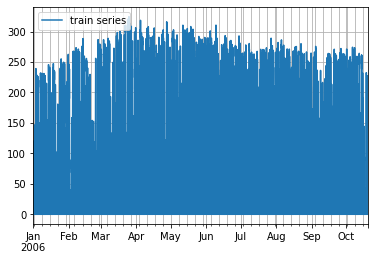

In [28]:
entry = next(iter(dataset.train))
train_series = to_pandas(entry)
train_series.plot()
plt.grid(which="both")
plt.legend(["train series"], loc="upper left")
plt.show()

TypeError: 'FileDataset' object is not subscriptable